In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.7.0'

In [4]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [5]:
training_set = train_datagen.flow_from_directory(r"C:\Users\Abhishek Chaubey\Documents\CleaningFramework",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r"C:\Users\Abhishek Chaubey\Documents\CleaningFramework",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 7480 images belonging to 2 classes.
Found 7480 images belonging to 2 classes.


In [6]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [7]:
from tensorflow.keras.regularizers import l2

In [8]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [10]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
234/234 [==============================] - 355s 2s/step - loss: 0.4166 - accuracy: 0.8108 - val_loss: 0.2749 - val_accuracy: 0.9066
Epoch 2/15
234/234 [==============================] - 39s 167ms/step - loss: 0.2600 - accuracy: 0.8892 - val_loss: 0.2235 - val_accuracy: 0.9197
Epoch 3/15
234/234 [==============================] - 56s 241ms/step - loss: 0.2120 - accuracy: 0.9076 - val_loss: 0.1885 - val_accuracy: 0.9051
Epoch 4/15
234/234 [==============================] - 38s 163ms/step - loss: 0.1794 - accuracy: 0.9226 - val_loss: 0.1324 - val_accuracy: 0.9459
Epoch 5/15
234/234 [==============================] - 35s 152ms/step - loss: 0.1391 - accuracy: 0.9444 - val_loss: 0.1169 - val_accuracy: 0.9365
Epoch 6/15
234/234 [==============================] - 33s 142ms/step - loss: 0.1105 - accuracy: 0.9539 - val_loss: 0.0833 - val_accuracy: 0.9717
Epoch 7/15
234/234 [==============================] - 30s 127ms/step - loss: 0.0893 - accuracy: 0.9662 - val_loss: 0.0683 - val_accu

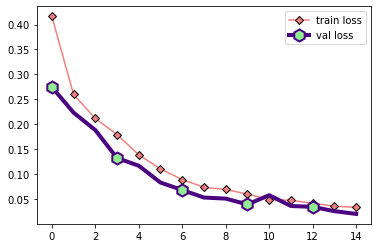

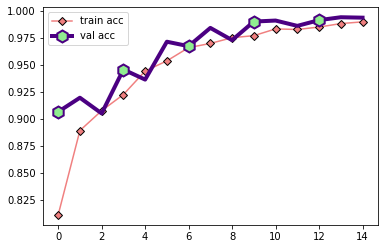

<Figure size 432x288 with 0 Axes>

In [11]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss', color='lightcoral', marker='D', markeredgecolor='black')
plt.plot(r.history['val_loss'], label='val loss', color='#4b0082', linewidth=4,
         marker='h', markerfacecolor='lightgreen', markeredgewidth=2,
         markersize=12, markevery=3)
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc', color='lightcoral', marker='D', markeredgecolor='black')
plt.plot(r.history['val_accuracy'], label='val acc', color='#4b0082', linewidth=4,
         marker='h', markerfacecolor='lightgreen', markeredgewidth=2,
         markersize=12, markevery=3)
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [12]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_rkitchen_framework.h5')

In [13]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_rkitchen_framework.h5')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [15]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(r'C:\Users\Abhishek Chaubey\Documents\CleaningFramework\HouseholdCleaning\aug_0_5933.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [20]:
result


array([[5.9548635]], dtype=float32)

In [17]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(r'C:\Users\Abhishek Chaubey\Documents\CleaningFramework\OutsideCleaning\aug_0_50.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [18]:
result

array([[5.9548635]], dtype=float32)

In [21]:
if result[0]<0:
    print("The image classified is inside the house cleaning")
else:
    print("The image classified is outside the house cleaning")

The image classified is outside the house cleaning
